# Final Project: Calcium Curve Analysis
### Amy Ji, Oct 10th 2025

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import find_peaks

### Step 1: Data import and cleaning

In [2]:
# read file
df = pd.read_excel("calcium_curves.xlsx", header = 1)
df.head()

,Intensity Mean,Unit,Category,Channel,Image,Time,Set 1,TrackID,ID
0,817.684021,NaN,Spot,1,Image 1,1,Class B,1000078592,78592
1,734.706970,NaN,Spot,1,Image 1,1,Class B,1000078593,78593
2,769.390015,NaN,Spot,1,Image 1,1,Class B,1000078596,78596
3,743.325012,NaN,Spot,1,Image 1,1,Class B,1000078605,78605
4,753.684021,NaN,Spot,1,Image 1,1,Class B,1000078612,78612


In [3]:
# Extract columns and pass into new dataframe.
caCurve = pd.DataFrame(df[["TrackID", "Time", "Intensity Mean"]].copy())
caCurve

,TrackID,Time,Intensity Mean
0,1000078592,1,817.684021
1,1000078593,1,734.706970
2,1000078596,1,769.390015
3,1000078605,1,743.325012
4,1000078612,1,753.684021
...,...,...,...
28935,1000094095,121,1016.309998
28936,1000124400,121,876.570984
28937,1000079324,121,1064.250000
28938,1000119112,121,832.604980


In [4]:
# is_consecutive takes as input an array of data and determine if it is consecutive.
def is_consecutive(time):
    # Check if the column values are consecutive
    return list(time) == list(range(min(time), max(time) + 1))

In [5]:
# Create a new dataframe to store only the consecutive value.
consecutive_caCurve = pd.DataFrame(columns = ["TrackID", "Time", "Intensity Mean"])

In [6]:
Track_ID = caCurve["TrackID"].unique()

In [7]:
# create an empty list to store value 
all_data = []
# loop through all unique ID
for ID in Track_ID:
    # copy all data in caCUrve that has that unqiue TrackID into a subset dataframe. 
    subsets = caCurve[caCurve["TrackID"] == ID].copy()
    time = subsets["Time"]
    intMean = subsets["Intensity Mean"]
    # Check if the time column of the subset is consecutive.
    if is_consecutive(time) == False:
        smooth_time = np.arange(min(time), max(time)+1)
        smooth_intMean = np.interp(smooth_time, time, intMean)      
        
    else:
        smooth_time = time
        smooth_intMean = intMean

    df1 = pd.DataFrame({"TrackID": ID, 
                        "Intensity Mean" : smooth_intMean, 
                        "Time": smooth_time
                       })
    all_data.append(df1)

consecutive_caCurve = pd.concat(all_data, ignore_index=True)  

In [8]:
consecutive_20_caCurve = pd.DataFrame(columns = ["TrackID", "Time", "Intensity Mean"])

In [9]:
data20 = []

for ID in Track_ID:
    subset = consecutive_caCurve[consecutive_caCurve["TrackID"]== ID].copy()
    print(subset)
    if subset["Time"].size > 20:
        time = subset["Time"]
        ids = subset["TrackID"]
        intMean = subset["Intensity Mean"]
        df2 = pd.DataFrame({"TrackID":ID, "Intensity Mean": intMean, "Time": time})

        data20.append(df2)

consecutive_20_caCurve = pd.concat(data20)
               

        TrackID  Intensity Mean  Time
0    1000078592      817.684021     1
1    1000078592      866.911987     2
2    1000078592      907.570007     3
3    1000078592      929.346985     4
4    1000078592      912.531982     5
..          ...             ...   ...
116  1000078592      829.090027   117
117  1000078592      835.362000   118
118  1000078592      868.405029   119
119  1000078592      856.784973   120
120  1000078592      840.950012   121

[121 rows x 3 columns]
        TrackID  Intensity Mean  Time
121  1000078593      734.706970     1
122  1000078593      724.684021     2
123  1000078593      738.127014     3
124  1000078593      733.500000     4
125  1000078593      733.487000     5
..          ...             ...   ...
237  1000078593      940.627991   117
238  1000078593      972.346985   118
239  1000078593     1083.810059   119
240  1000078593     1101.339966   120
241  1000078593     1020.630005   121

[121 rows x 3 columns]
        TrackID  Intensity Mean  Time
24

In [10]:
consecutive_20_caCurve

,TrackID,Intensity Mean,Time
0,1000078592,817.684021,1
1,1000078592,866.911987,2
2,1000078592,907.570007,3
3,1000078592,929.346985,4
4,1000078592,912.531982,5
...,...,...,...
30237,1000145701,917.013000,117
30238,1000145701,941.820007,118
30239,1000145701,956.526001,119
30240,1000145701,966.359009,120


In [11]:
#final_curve = pd.DataFrame(columns = ["TrackID", "Time", "Intensity Mean", "Smooth Intensity", "Derivatives"])

In [12]:

# Create a list for storing the results
full_col = []
# Define the window_size
window_size = 5

# Loop through the unique IDs
for ID in consecutive_20_caCurve["TrackID"].unique():
    # Extract data for this ID (sorted by Time)
    df_track5 = (consecutive_20_caCurve[consecutive_20_caCurve["TrackID"] == ID]
                 .sort_values("Time")
                 .copy())

    # Moving average of "Intensity Mean" within this TrackID
    moving_mean = df_track5["Intensity Mean"].rolling(window=window_size, min_periods=1, center=True).mean()

    # Derivative of the smoothed series w.r.t. Time
    deri = np.gradient(moving_mean.to_numpy(), df_track5["Time"].to_numpy())

    # Assemble per-ID result
    df_new = pd.DataFrame({
        "TrackID": df_track5["TrackID"].values,
        "Time": df_track5["Time"].values,
        "Intensity Mean": df_track5["Intensity Mean"].values,
        "Smooth Intensity": moving_mean.values,     
        "Derivatives": deri,                   
    })

    full_col.append(df_new)

# Combine all IDs
final_curve = pd.concat(full_col, ignore_index=True)


In [13]:
# final_curve contain only TrackID that has more than 20 data points and are consecutive. 
# It also contains two new columns: Smooth Intensity and Derivatives. 
final_curve

,TrackID,Time,Intensity Mean,Smooth Intensity,Derivatives
0,1000078592,1,817.684021,864.055339,16.322912
1,1000078592,2,866.911987,880.378250,11.376829
2,1000078592,3,907.570007,886.808997,12.439268
3,1000078592,4,929.346985,905.256787,14.918597
4,1000078592,5,912.531982,916.646191,5.867700
...,...,...,...,...,...
28549,1000145701,117,917.013000,938.928809,1.927197
28550,1000145701,118,941.820007,948.720605,2.899500
28551,1000145701,119,956.526001,944.727808,1.467952
28552,1000145701,120,966.359009,951.656509,5.103768


### Step 2: Finding Peaks and activated cells

In [14]:
cell_peak = pd.DataFrame(columns = ["TrackID", "Peak", "Peak Time"])
    

In [15]:
np.average(final_curve["Intensity Mean"])

np.float64(833.9737099924533)

In [396]:
peaklist = []
# set intensity threshold to be.
thresh = 800


for ID in Track_ID:
    
    subset = final_curve[final_curve["TrackID"] == ID].dropna()
    
    
    
    TrackID = ID
    d = subset["Derivatives"]
    # Find local max.
    PeaksIdx, _ = find_peaks(d, height = 0)
    
    for idx in PeaksIdx:
        PeaksSubset = subset.iloc[[idx]] 
        if PeaksSubset["Smooth Intensity"].item() >= thresh:
            df3 = pd.DataFrame({
                "TrackID": [TrackID],
                "Peak": [PeaksSubset["Smooth Intensity"].iloc[0]],
                "Peak Time": [PeaksSubset["Time"].iloc[0]]
            })
            peaklist.append(df3)
# The cell_peak df ends up containing activated cells. Cells that are not in this df will be considered inactivated.
cell_peak = pd.concat(peaklist)
             
    

In [397]:
# The cell_peak dataframe contains all cells that are activated and their corresponding peak and time of peak. 
# Note that it is only considered a peak if the Smooth Intensity of the corresponding peak time is greater than the defined threshold.
cell_peak

,TrackID,Peak,Peak Time
0,1000078592,905.256787,4
0,1000078592,894.559985,13
0,1000078592,900.185999,16
0,1000078592,875.769189,28
0,1000078592,884.841797,31
...,...,...,...
0,1000145641,906.629004,111
0,1000145701,963.651599,105
0,1000145701,958.710620,114
0,1000145701,948.720605,118


In [398]:
activated_ID = cell_peak["TrackID"].unique()

In [399]:
selected_cells = pd.DataFrame(columns = ["TrackID", "Activation Time"])

In [449]:
act_list = cell_peak.groupby("TrackID", as_index = False)["Peak Time"].min().rename(columns={"Peak Time": "Activation Time"})
act_df = pd.DataFrame(act_list)

deact_list = []
for ID in final_curve["TrackID"].unique():  # <-- call unique()
    if ID not in set(activated_ID):                  # <-- safe membership test
        deact_list.append(ID)
        
deact_df = pd.DataFrame({"TrackID": deact_list})


In [450]:
# Define a function to graph. 
def select_cell_plots(numRows, numCols, df_full, selected_cells):
    for ii in range(numRows):
        for jj in range(numCols):
            
            # Subplot layout
            plt.subplot(numRows, numCols, numCols * ii + jj + 1)
            # Get intensity and time data for the ID
            cellID = selected_cells.iloc[numCols * ii + jj, 0]
            data = df_full[df_full['TrackID'] == cellID]
    
            
            # If activated, plot activation point as a red dot
            if selected_cells.shape[1] == 2: 
                # Get data for activation point
                activation_point = selected_cells.iloc[numCols * ii + jj, 1]
                activation_point_intensity = data[data["Time"] == activation_point]
                # Plot the activation point as a red dot
                plt.scatter(activation_point, activation_point_intensity["Intensity Mean"], c='red', s=10, marker='v')
        
                
            # Plot Intensity Vs Time    
            plt.plot(data["Time"], data["Intensity Mean"])
            plt.plot(data["Time"], data["Smooth Intensity"])
            # Make subplots look nicer
            plt.xticks([])
            plt.yticks([])
            plt.xlim(0, max(data["Time"]))
            y_min = 0.98 * min(data["Intensity Mean"])
            y_max = 1.1 * max(data["Intensity Mean"])           
            plt.ylim(y_min, y_max)
            
    plt.tight_layout()

In [451]:
rng = 42
act_sel  = act_df.sample(n=50, random_state=rng)[["TrackID", "Activation Time"]].reset_index(drop=True)
deact_sel = deact_df.sample(n=50, random_state=rng)[["TrackID"]].reset_index(drop=True)

act_data   = final_curve[final_curve["TrackID"].isin(act_sel["TrackID"])].sort_values(["TrackID","Time"]).reset_index(drop=True)
deact_data = final_curve[final_curve["TrackID"].isin(deact_sel["TrackID"])].sort_values(["TrackID","Time"]).reset_index(drop=True)

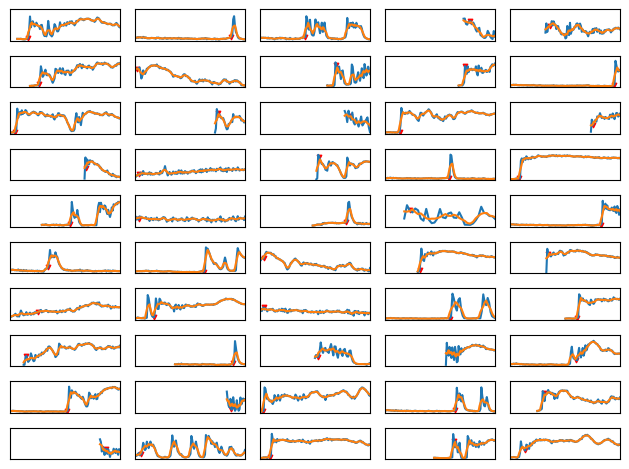

In [452]:
select_cell_plots(10,5,act_data, act_sel)

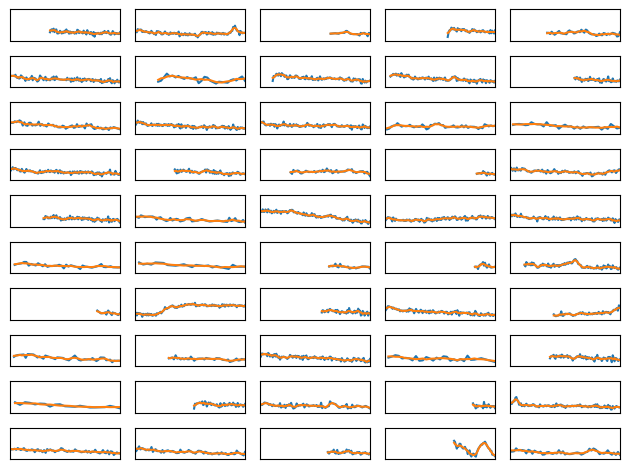

In [453]:
select_cell_plots(10,5,deact_data, deact_sel)

In [493]:

# columns to keep
cols = ["TrackID", "Time", "Intensity Mean"]

# boolean masks (returns a series of true/false value and has the same index as in final_curve)
# This replaced the for loop we've been using. Basically determining if the ID in final_curve is also in activated_ID. 
mask_act = final_curve["TrackID"].isin(activated_ID)

# Activated rows (if mask_act is true, locate the columns we want and put to activated df)
activated_full_df   = final_curve.loc[mask_act, cols].reset_index(drop=True)

# Unactivated rows (if mask_act is false, locate the columns we want and put to deactivated df)
deactivated_full_df = final_curve.loc[~mask_act, cols].reset_index(drop=True)


In [494]:
activated_full_df

,TrackID,Time,Intensity Mean
0,1000078592,1,817.684021
1,1000078592,2,866.911987
2,1000078592,3,907.570007
3,1000078592,4,929.346985
4,1000078592,5,912.531982
...,...,...,...
17534,1000145701,117,917.013000
17535,1000145701,118,941.820007
17536,1000145701,119,956.526001
17537,1000145701,120,966.359009


In [456]:
deactivated_full_df

,TrackID,Time,Intensity Mean
0,1000078596,1,769.390015
1,1000078596,2,769.914001
2,1000078596,3,780.307983
3,1000078596,4,780.078003
4,1000078596,5,774.135986
...,...,...,...
11010,1000145606,117,707.075012
11011,1000145606,118,713.252991
11012,1000145606,119,706.239990
11013,1000145606,120,705.843994


In [457]:
percentage = 100 * len(activated_full_df)/ len(final_curve)
percentage

61.42396862085872

In [484]:
act_df

,TrackID,Activation Time
0,1000078592,4
1,1000078593,89
2,1000078605,17
3,1000078624,44
4,1000078630,19
...,...,...
196,1000144144,106
197,1000144596,108
198,1000145306,106
199,1000145641,111


In [510]:

act_times = act_df.groupby("TrackID", as_index=False)["Activation Time"].min()

# Merge activation time onto the activated rows
aligned_df = activated_full_df.copy().merge(act_times, on="TrackID", how="left")

# 3) Align: activation becomes 0, earlier times negative, later positive
aligned_df["Time_aligned"] = (
    aligned_df["Time"] - aligned_df["Activation Time"]
)


In [511]:
aligned_df

,TrackID,Time,Intensity Mean,Activation Time,Time_aligned
0,1000078592,1,817.684021,4,-3
1,1000078592,2,866.911987,4,-2
2,1000078592,3,907.570007,4,-1
3,1000078592,4,929.346985,4,0
4,1000078592,5,912.531982,4,1
...,...,...,...,...,...
17534,1000145701,117,917.013000,105,12
17535,1000145701,118,941.820007,105,13
17536,1000145701,119,956.526001,105,14
17537,1000145701,120,966.359009,105,15


In [527]:
avg_sem = (aligned_df.groupby("Time_aligned")["Intensity Mean"]
           # use .agg to apply one ore more aggregation function to the group
           .agg(mean='mean',
                # define an anonymous function and call it to compute sem on intensity for each time group
                sem= lambda x: np.std(x, ddof=1) / np.sqrt(x.size))
           .reset_index())

In [528]:
avg_sem

,Time_aligned,mean,sem
0,-116,739.156006,NaN
1,-115,738.000000,NaN
2,-114,740.161987,NaN
3,-113,743.537994,6.488007
4,-112,744.913483,8.618500
...,...,...,...
231,115,1064.807895,85.200872
232,116,1067.182650,90.325389
233,117,1073.727291,108.987942
234,118,946.716654,64.854687


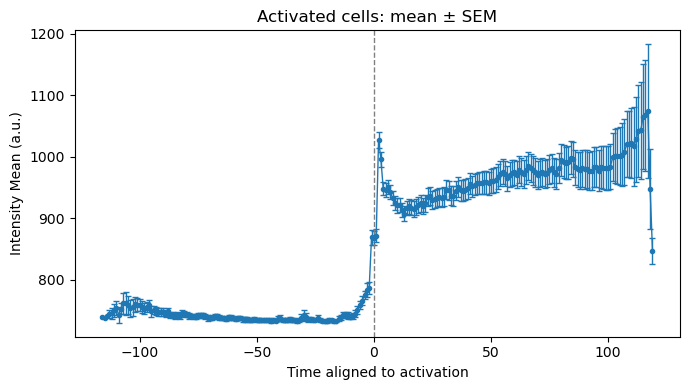

In [529]:
# use time aligned as x axis
x = avg_sem["Time_aligned"].to_numpy()
# use mean at each time points as y axis
y = avg_sem["mean"].to_numpy()
# use sem as error bar
e = avg_sem["sem"].to_numpy()

# plot figure.
plt.figure(figsize=(7,4))
plt.errorbar(x, y, yerr=e, fmt='-o', markersize=3, linewidth=1, capsize=2)
plt.axvline(0, ls='--', lw=1, color='gray')  # activation at 0
plt.xlabel("Time aligned to activation")
plt.ylabel("Intensity Mean (a.u.)")
plt.title("Activated cells: mean ± SEM")
plt.tight_layout()
plt.show()
